# SkillCraft dataset
## Context
## Regression Tree
## Dataset preparation

In [47]:
# Import necessary libraries
from encodings import search_function
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Import necessary tools from the sklearn library
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import roc_curve, f1_score, accuracy_score, recall_score, precision_score, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [52]:
# load datasets function
def load_data(data_file_name):
    data_dir = "..\..\..\data\data_regression"
    data_path = os.path.join(data_dir, data_file_name)
    df = pd.read_csv(data_path)
    data_X = df.iloc[:,:-1]
    data_y = df.iloc[:,-1]
    scaler_X = StandardScaler()
    data_X = scaler_X.fit_transform(data_X)
    scaler_y = MinMaxScaler()
    data_y = np.array(data_y)
    data_y = scaler_y.fit_transform(data_y.reshape(-1,1)).reshape(-1)
    return data_X, data_y

In [53]:
def main():
    
    # read dataset from csv file
    data_name = "SkillCraft_regression"
    data_X, data_y = load_data("{}.csv".format(data_name))
    
    # Randomly assingning a train and test set
    train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.33, random_state=2200)
    return train_X, test_X, train_y, test_y

## Implementing Ridge Regression

In [56]:
class RidgeRegression():
    '''
    This is a class for ridge regression algorithm.
    
    The class contains the hyper parameters of the ridge regression algorithm as attributes, such as the regurization 
    parameter(Lambda).
    It also contains the functions for initializing the class, calculating the loss, fitting the ridge regression 
    model and use the fitted model to predict test samples.
    
    Attributes:
        lr:        learning rate of gradient descent
        Lambda:    regularization parameter for L_2 penalty
        max_itr:   maximum number of iteration for gradient descent
        tol:       if the change in loss is smaller than tol, then we stop iteration
        W:         concatenation of weight w and bias b
        
    '''
    def __init__(self, lr, Lambda, max_itr, tol):
        '''
        Initialize the RidgeRegression class
        '''
        self.lr = lr
        self.Lambda = Lambda
        self.max_itr = max_itr
        self.tol = tol
        
    def _loss_ridge(self, X, y, W):
        '''
        Calculating the regularized empirical loss
        '''
        return ((y-X@W).T@(y-X@W))[0,0] + self.Lambda * np.sum(W[:X.shape[1]-1,0]**2)
    
    
    def fit(self,x,y):  
        '''
        estimate the weight and bias in the ridge regression model by gradient descent
        
        Args: 
            x (matrix, num_train*num_variables): input of training samples
            y (matrix, num_test*1): output of training samples
            
        Returns:
            self.W (matrix, (num_variables+1)*1): estimation of weight w and bias b
        ''' 
        m = x.shape[0]
        ### Add the all-one vector to the last column 
        X = np.concatenate((x,np.ones((m,1))),axis=1)
        d = X.shape[1]
        self.W = np.ones((d,1))
        
        ### Use the gradient descent to update W
        previous_loss = self._loss_ridge(X, y, self.W)
        for i in range(self.max_itr):
            L_2_der_W = np.zeros((d,1))
            L_2_der_W[:d,0] = self.W[:d,0]
            gradient = X.T@(X@self.W-y)/m + self.Lambda * L_2_der_W
            self.W = self.W - self.lr * gradient
            current_loss = self._loss_ridge(X, y, self.W)
            if previous_loss - current_loss < self.tol:
                print(f'Converged after {i} iterations')
                break
            else:
                previous_loss = current_loss
        return self.W
    
    def predict(self,x): 
        '''
        predict the output of the test samples
        
        Args: 
            x (matrix, num_test*num_variables): input of test samples
            
        Returns:
            y (matrix, num_test*1): predicted outputs of test samples
        ''' 
        m = x.shape[0]
        X = np.concatenate((x, np.ones((m,1))),axis=1)
        return np.dot(X, self.W)

In [57]:
from sklearn.metrics import mean_squared_error
### Initial the class RidgeRegression by assigning values to the parameters.
model = RidgeRegression(lr=0.01, Lambda=0.002, max_itr = 20000, tol = 1e-5)
### Fit model with training data
W = model.fit(main()[0], main()[2])
### Predict the output of test samples
y_pred = model.predict(main()[1])
### Evaluate the model by calculating the MSE of test samples.
mse = mean_squared_error(y_pred, main()[3])
### Print MSE 
print("MSE of Ridge Regression is {}".format(mse))
### Print the estimated w and b
print("The weight w of Ridge Regression is \n {}.".format(W[:main()[2].shape[1],0].T))
print("The bias b of Ridge Regression is {}.".format(W[main()[2].shape[1],0]))

KeyboardInterrupt: 

In [23]:
# load datasets function
def load_data(data_file_name):
    data_dir = "..\..\..\data\data_regression"
    data_path = os.path.join(data_dir, data_file_name)
    df = pd.read_csv(data_path)
    data_X = df.iloc[:,:-1]
    data_y = df.iloc[:,-1]
    scaler_X = StandardScaler()
    data_X = scaler_X.fit_transform(data_X)
    scaler_y = MinMaxScaler()
    data_y = np.array(data_y)
    data_y = scaler_y.fit_transform(data_y.reshape(-1,1)).reshape(-1)
    return data_X, data_y

In [24]:
def main():
    
    # read dataset from csv file
    data_name = "SkillCraft_regression"
    data_X, data_y = load_data("{}.csv".format(data_name))
    data_X, data_y = pd.DataFrame(data_X), pd.Series(data_y)
    data_y = (data_y - data_y.mean()) / data_y.std()

    # Randomly assingning a train and test set
    train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.33, random_state=2200)
    return train_X, test_X, train_y, test_y, data_X, data_y

In [25]:
# I am loading the full dataset and renaming the columns to keep better track of each attribute
data_dir = "..\..\..\data\data_regression"
data_path = os.path.join(data_dir, "SkillCraft_regression.csv")
df = pd.read_csv(data_path, header=0)
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,Unnamed: 20
0,52,5,27,10,3000,143.718,0.004,0.000,7,0.000,...,0.005,32.668,40.867,4.751,28,0.001,6,0.000,0.000,NaN
1,55,5,23,10,5000,129.232,0.003,0.000,4,0.000,...,0.004,32.919,42.345,4.843,22,0.001,5,0.000,0.000,NaN
2,56,4,30,10,200,69.961,0.001,0.000,4,0.000,...,0.003,44.648,75.355,4.043,22,0.001,6,0.000,0.000,NaN
3,57,3,19,20,400,107.602,0.001,0.000,1,0.000,...,0.004,29.220,53.735,4.915,19,0.000,7,0.000,0.000,NaN
4,58,3,32,10,500,122.891,0.001,0.000,2,0.000,...,0.002,22.689,62.081,9.374,15,0.001,4,0.000,0.000,NaN


# 1.2 Implement the class of regression tree

In [26]:
### criterion function for regression tree
def sum_squared_distance_to_mean(X, y):
    '''
    function used to calculate the squared error.
    '''
    n = X.shape[0]
    return np.var(y) * n

class DecisionTreeRegressor(object):
    '''
    This class is for decision tree regression

    Attributes:
        - criterion: a function used as the criterion of decision tree regression
        - tolS: a tolerance on the error reduction. we will stop the splitting if
            low error reduction.
        - tree: a nested dictionary representing the decision tree structure.
    '''
    def __init__(self, criterion, tolS=0.1):
        # Initialization
        self.criterion = criterion
        self.tolS = tolS

    def fit(self, X, y):
        '''
        function used to fit the decision tree regressor

        Args:
            X - features of training samples, a pandas dataframe with shape (n, d), where
                X.columns is the column name of X, and we can use X['feat'] to index all
                values of the feature named `feat`.
            y - target values (continuous, scaled) of training samples, a pandas series with shape (n,)
        '''
        self.tree = self.create_tree(X, y)

    def predict(self, X):
        '''
        function used to fit the decision tree regressor

        Args:
            X - features of test samples, a pandas dataframe with shape (n, d)

        Returns:
            y - predictions of test samples, a pandas series with shape (n,)
        '''
        n = X.shape[0]
        y = []
        for i in range(n):
            y.append(self.predict_each(X.iloc[i], self.tree))
        y = pd.Series(y)
        y.index = X.index
        return y

    @staticmethod
    def choose_best_split(X, y, criterion, tolS=1):
        '''
        function used to choose the best split feature and split point

        Args:
            X - features of test samples, a pandas dataframe with shape (n, d)
            y - target values of training samples, a pandas series with shape (n,)
            criterion - function used to measure the quality of a split
            tolS - a tolerance on the error reduction.

        Returns:
            best_feat: the feature used to split on for this node
            best_split: the value of the feature used to split for this node
        '''
        # used to calculate the error reduction
        origin_score = criterion(X, y)
        # initialize
        best_feat, best_split = None, None
        best_score = np.inf
        # search for each feature
        for feat in X.columns:
            # if all values of this feature are equal, do not split this feature
            X_feat_value = set(X[feat])
            if len(X_feat_value) == 1:
                continue
            # otherwise, search for each possible split point of this feature
            for split in X_feat_value:
                # divide the dataset into two parts according to the split
                idx1 = X[feat] < split
                idx2 = X[feat] >= split
                # calculate score to evaluate the quality of a split
                score1 = criterion(X.loc[idx1], y.loc[idx1])
                score2 = criterion(X.loc[idx2], y.loc[idx2])
                score = score1 + score2
                if score < best_score:
                    # choose the split with the largest (variance) reduction
                    best_feat = feat
                    best_split = split
                    best_score = score
        if origin_score - best_score < tolS:
            # Do not split if the (variance) reduction is low
            return None, None
        else:
            # return the feature and the value used for the split
            return best_feat, best_split

    def create_tree(self, X, y):
        '''
        build the decision tree regressor in a recursive manner.
        use a dictionary to represent tree node:
            if the tree node is an internal node, the dictionary will have the following five items:
                - tree["is_leaf"] stores whether the tree node is a leaf node or not.
                - tree["split_feat"] stores the feature used to split on for this node
                - tree["split_point"] stores the value of the feature used to split
                - tree["left"] is a (nested) dictionary used to store the left subtree of this node.
                - tree["right"] is a (nested) dictionary used to store the right subtree of this node.
            if the tree node is a leaf node, the dictionary will have the following two items:
                - tree["is_leaf"] stores whether the tree node is a leaf node or not.
                - tree["value"] stores the prediction at the leaf node
        returns a nested dictionary used to store the tree structure.
        '''
        Tree = {}
        # create a leaf node if all values are equal
        y_values, y_counts = np.unique(y, return_counts=True)
        if len(y_counts) == 1:
            Tree["is_leaf"] = True
            Tree["value"] = y_values[0]
            return Tree
        # create a leaf node if feature set is empty (a low error reduction)
        feat, split = self.choose_best_split(X, y, self.criterion, self.tolS)
        if feat is None:
            Tree["is_leaf"] = True
            Tree["value"] = y.mean()
            return Tree
        # otherwise, create an internal node
        Tree["is_leaf"] = False
        Tree["split_feat"] = feat
        Tree["split_point"] = split
        # divide the dataset (X, y) into two parts according to tree split
        # build the left subtree
        idx = X[feat] < split
        Tree["left"] = self.create_tree(X.loc[idx], y.loc[idx])
        # build the right subtree
        idx = X[feat] >= split
        Tree["right"] = self.create_tree(X.loc[idx], y.loc[idx])
        return Tree

    @staticmethod
    def predict_each(x, tree):
        '''
        for each sample, get the prediction of decision tree regressor in a recursive manner.

        Args:
            x - features of a sample, a pandas Series with shape (d,)
            tree - a nested dictionary representing the decision tree structure.

        Returns:
            the prediction of the sample `x`
        '''
        if tree["is_leaf"] is True:
            # if the `tree` is a leaf node, get the prediction at the leaf node
            return tree["value"]
        else:
            # the 'tree' is a nested dictionary with the following four items:
            #     `split_feat`, `split_point`, `left`, 'right`.
            # get the feature used to split on for this tree
            feat = tree["split_feat"]
            # get the value of the feature used to split
            split = tree["split_point"]
            # get the value of the feature for the sample `x`
            value = x[feat]
            if value < split:
                # search for the left subtree
                return DecisionTreeRegressor.predict_each(x, tree["left"])
            else:
                # search for the right subtree
                return DecisionTreeRegressor.predict_each(x, tree["right"])


## 1.3 Fit the model 

In [27]:
def run():
    # dataset preparation
    X, y = main()[0], main()[2]
    # initialize the decision tree regressor
    model = DecisionTreeRegressor(criterion=sum_squared_distance_to_mean, tolS=0.1)
    # fit the regression tree
    model.fit(X, y)
    # get the prediction of samples
    y_hat = model.predict(main()[1])
    # calculate the mean squared error of samples
    print("The MSE of Random Regression Tree is:", ((y - y_hat)**2).mean())

In [28]:
run()

The MSE of Random Regression Tree is: nan


# Suppor Vector Regressor

In [9]:
# I am loading the full dataset and renaming the columns to keep better track of each attribute
data_dir = "..\..\..\data\data_regression"
data_path = os.path.join(data_dir, "SkillCraft_regression.csv")
df = pd.read_csv(data_path, header=0)
df = df.iloc[:,:-1]
df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.718,0.004,0.000,7,0.000,0.000,0.005,32.668,40.867,4.751,28,0.001,6,0.000,0.000
1,55,5,23,10,5000,129.232,0.003,0.000,4,0.000,0.000,0.004,32.919,42.345,4.843,22,0.001,5,0.000,0.000
2,56,4,30,10,200,69.961,0.001,0.000,4,0.000,0.000,0.003,44.648,75.355,4.043,22,0.001,6,0.000,0.000
3,57,3,19,20,400,107.602,0.001,0.000,1,0.000,0.001,0.004,29.220,53.735,4.915,19,0.000,7,0.000,0.000
4,58,3,32,10,500,122.891,0.001,0.000,2,0.000,0.001,0.002,22.689,62.081,9.374,15,0.001,4,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,0,0,0,259.630,0.020,0.001,9,0.001,0.000,0.005,18.606,42.834,6.275,46,0.001,5,0.000,0.000
3391,10090,8,0,0,0,314.670,0.028,0.001,10,0.000,0.001,0.004,14.302,36.116,7.197,16,0.001,4,0.000,0.000
3392,10092,8,0,0,0,299.428,0.028,0.001,7,0.000,0.000,0.004,12.403,39.516,6.398,19,0.001,4,0.000,0.000
3393,10094,8,0,0,0,375.866,0.036,0.001,5,0.000,0.001,0.004,11.691,34.855,7.962,15,0.001,6,0.000,0.001


In [10]:
# It truly doesn't matter the GameID, so I am going to dop it to avoid it affecting my model
df.drop("GameID", axis = 1, inplace = True) 

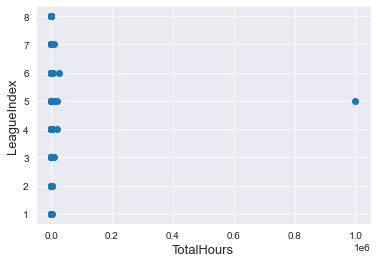

In [11]:
#scatter plot of total hours vs rank

fig, ax = plt.subplots()
ax.scatter(x = df['TotalHours'], y = df['LeagueIndex'])
plt.ylabel('LeagueIndex', fontsize=13)
plt.xlabel('TotalHours', fontsize=13)
#plt.xlim([0, 100000])
plt.show()

In [12]:
# There is definitrly an outlier that played over 1000000 hours.
# I will be dropping this kid from the dataset as this data most likely affects my model

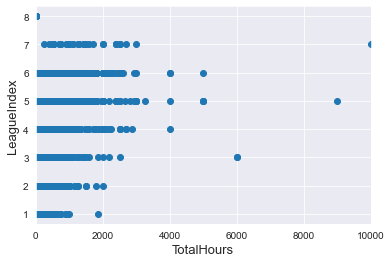

In [13]:
#scatter plot of total hours vs rank

fig, ax = plt.subplots()
ax.scatter(x = df['TotalHours'], y = df['LeagueIndex'])
plt.ylabel('LeagueIndex', fontsize=13)
plt.xlabel('TotalHours', fontsize=13)
plt.xlim([0, 10000])
plt.show()

This dataset is trying to predict the rank of high level players, meaning they have most certainly played for more than 1000 hours. The ones that have not we can assume are new accounts, and in my opinion should be pat of the dataset. 


 mu = 4.18 and sigma = 1.52



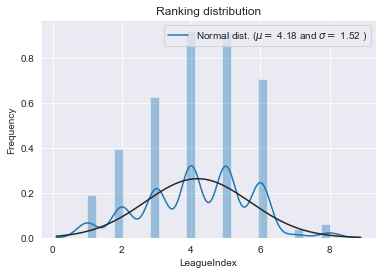

In [14]:
sns.distplot(df['LeagueIndex'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['LeagueIndex'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Ranking distribution')
plt.show()

<AxesSubplot:>

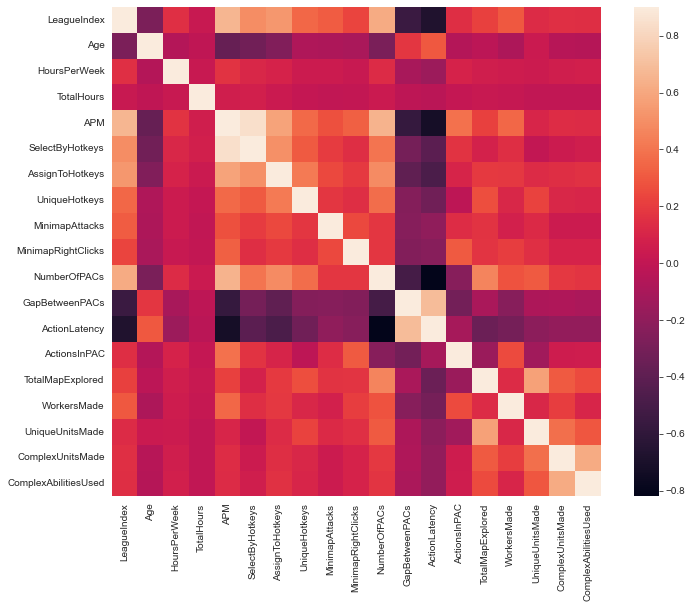

In [15]:
#Correlation map to see how features are correlated with LeagueIndex
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

This plot helps me identify that the best predictors to be APM, NumberofPACs, and AssigntoHotkeys.The lighter the color the more correlation between the two variables. Age could be categorical data, but I will leave it as numerical.

In [16]:
# I need to remove the rank which is what I want to predict
dfy = df['LeagueIndex']
df.drop(['LeagueIndex'], axis=1, inplace=True)


In [17]:
#Find all the NA values and print them out in a percentage

data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio



 mu = 117.05 and sigma = 51.94



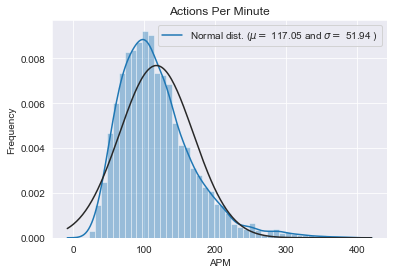

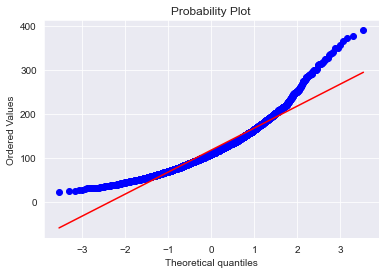

In [18]:
sns.distplot(df['APM'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['APM'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Actions Per Minute')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['APM'], plot=plt)
plt.show()

It is not perfect, but is honest work. Let's model this baby. 

In [19]:

X = np.array(df)
y = np.array(dfy)
# normalize
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
scaler_y = MinMaxScaler()
data_y = scaler_y.fit_transform(y.reshape(-1,1)).reshape(-1)

# split the train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2022)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2274, 18)
(1121, 18)
(2274,)
(1121,)


## 2.2 Implementation of SVR

In [20]:
class MySVR():
    '''
    This is a class for support vector regressor.
    
    The class contains the hyper-parameters such as $C$, $\epsilon$ and the kernel bandwidth $\sigma$. It also contains 
    the alpha vector, the tolerance for prediction error and the maximum number of iteration.
    
    It contains the functions for calculating the kernel matrix, fitting the model to estimate alpha, hat_alpha and b 
    with SMO algorithm, making predictions and other fundamental functions.
    
    Attributes:
        C (positive number)         - the hyperparameter for SVM algorithm
        sigma (positive number)     - the kernel bandwidth $\sigma$ of Gaussian kernel 
        toler (positive number)     - $\epsilon$, the threshold value of prediction error. If the prediction error of 
                                      a sample is larger than this value, the corresponding alphas[i] or hat_alpha[i]
                                      will be probably updated.
        maxIter (positive integer)  - the maximum number of iteration to search a pair of alpha's to update
        alphas (vector, num_samples) - the alpha vector in the dual problem 
        hat_alphas (vector, num_samples) - the hat_alpha vector in the dual problem 
        b (number)                  - the bias b
    '''
    
    def __init__(self, C = 1, sigma = 1, toler = 1, maxIter = 10):
        self.C = C
        self.sigma = sigma
        self.toler = toler
        self.maxIter = maxIter
        self.alphas = 0
        self.hat_alphas = 0
        self.b = 0
        
    def rbfkernel(self, X, Y):
        '''
        Calculate the kernel matrix whose (i,j)-th entry is $k(X[i,:], Y[j,:])$.
        '''
        m = X.shape[0]
        n = Y.shape[0]
        K = np.zeros(shape=(m, n))
        for i in range(m):
            for j in range(n):
                K[i, j] = np.sum((X[i,:] - Y[j,:])**2)
        K = np.exp(-K / (2 * self.sigma**2))
        return K

    def selectJrand(self, i, m):
        '''
        Randomly choose an index $j\neq i$ from 0 to m-1 and choose alpha[i] (or hat_alpha[i]) if hat_alpha[i] = 0 (or alpha[i]=0).
        '''
        j = i
        while (j == i):
            j = int(np.random.uniform(0, m))
        if self.alphas[j] == 0:
            choose_hat_j = 1
        else:
            choose_hat_j = 0
        return (j, choose_hat_j)


    def clipAlpha(self, aj, H, L):
        '''
        Clip the vale aj by the lower bound L and upper bound H
        '''
        if aj > H:
            aj = H
        if L > aj:
            aj = L
        return aj


    def fit(self, X_train, y_train):
        '''
        estimate the alphas vector, hat_alpha vector and bias in the SVM model
        
        Args: 
            X_train (matrix, num_train*num_features): features of training samples
            y_train (vector, num_train): output of training samples
            
        Returns:
            self.b (a number)                     : the bias
            self.alphas (vector, num_samples)     : the alpha vector 
            self.hat_alphas (vector, num_samples) : the hat_alpha vector 
        ''' 
        K_train = self.rbfkernel(X_train, X_train)
        self.X_train = X_train
        m = K_train.shape[0]
        self.alphas = np.zeros((m, ))
        self.hat_alphas = np.zeros((m, ))
        num_iter = 0
        while (num_iter < self.maxIter):
            alphaPairsChanged = 0
            # optimize for each data vector (with kernel trick)
            for i in range(m):  
                ### choose hat_alphas[i] or alphas[i] to update
                if self.hat_alphas[i] == 0:
                    choose_hat_i = 0
                else:
                    choose_hat_i = 1
                fXi = (self.hat_alphas - self.alphas) @ K_train[i, :] + self.b
                Ei = fXi - y_train[i]
                ### if statement checks if an example violates KKT conditions
                if (abs(Ei) < self.toler) or (self.alphas[i] == self.C) or (self.hat_alphas[i] == self.C):
                    continue
                else:
                    j, choose_hat_j = self.selectJrand(i, m)
                    fXj = (self.hat_alphas-self.alphas) @ K_train[j, :] + self.b
                    Ej = fXj - y_train[j]
                    alphaJold = self.alphas[j]
                    alphaIold = self.alphas[i]
                    hat_alphaJold = self.hat_alphas[j]
                    hat_alphaIold = self.hat_alphas[i]
                    if (choose_hat_i == 0) and (choose_hat_j == 1):
                        L = max(0, self.alphas[i] - self.hat_alphas[j])
                        H = min(self.C, self.C + self.alphas[i] - self.hat_alphas[j])
                    elif (choose_hat_i == 1) and (choose_hat_j == 0):
                        L = max(0, self.hat_alphas[i] - self.alphas[j])
                        H = min(self.C, self.C + self.hat_alphas[i] - self.alphas[j])
                    elif (choose_hat_i == 0) and (choose_hat_j == 0):
                        L = max(0, self.alphas[i] + self.alphas[j] - self.C)
                        H = min(self.C, self.alphas[i] + self.alphas[j])
                    else:
                        L = max(0, self.hat_alphas[i] + self.hat_alphas[j] - self.C)
                        H = min(self.C, self.hat_alphas[i] + self.hat_alphas[j])
                    if L == H:
                        continue
                    eta = 2.0 * K_train[j, i] - K_train[j, j] - K_train[i, i]
                    if eta >= 0:
                        continue
                    ### Update i 
                    if (choose_hat_i == 0) and (choose_hat_j == 1):
                        self.alphas[i] += (2 * self.toler - Ei + Ej) / eta
                    elif (choose_hat_i == 1) and (choose_hat_j == 0):
                        self.hat_alphas[i] += (2 * self.toler + Ei - Ej) / eta
                    elif (choose_hat_i == 0) and (choose_hat_j == 0):
                        self.alphas[i] += (-Ei + Ej) / eta
                    else:
                        self.hat_alphas[i] += (Ei - Ej) / eta
                    if choose_hat_i == 0:
                        self.alphas[i] = self.clipAlpha(self.alphas[i], H, L)
                    else:
                        self.hat_alphas[i] = self.clipAlpha(self.hat_alphas[i], H, L)
                    ### Whether the change amount is large enough or not
                    if choose_hat_i == 0:
                        if (abs(self.alphas[i] - alphaIold) < 0.00001):
                            continue
                    else:
                        if (abs(self.hat_alphas[i] - hat_alphaIold) < 0.00001):
                            continue
                    # update j by the same amount as i
                    if (choose_hat_i == 0) and (choose_hat_j == 1):
                        self.hat_alphas[j] += self.alphas[i] - alphaIold
                    elif (choose_hat_i == 1) and (choose_hat_j == 0):
                        self.alphas[j] += self.hat_alphas[i] - hat_alphaIold
                    elif (choose_hat_i == 0) and (choose_hat_j == 0):
                        self.alphas[j] += alphaIold - self.alphas[i]
                    else:
                        self.hat_alphas[j] += hat_alphaIold - self.hat_alphas[i]
                    # update b
                    b1 = self.b - Ej - (self.hat_alphas[j] - hat_alphaJold - (self.alphas[j] - alphaJold))    \
                        * K_train[j, j] - (self.hat_alphas[i] - hat_alphaIold - (self.alphas[i] - alphaIold)) * K_train[i, j]
                    b2 = self.b - Ei - (self.hat_alphas[j] - hat_alphaJold - (self.alphas[j] - alphaJold))   \
                        * K_train[j, i] - (self.hat_alphas[i] - hat_alphaIold - (self.alphas[i] - alphaIold)) * K_train[i, i]
                    if ((0 < self.alphas[j]) and (self.C > self.alphas[j])) or ((0 < self.hat_alphas[j]) and (self.C > self.hat_alphas[j])): 
                        self.b = b1
                    elif ((0 < self.alphas[i]) and (self.C > self.alphas[i])) or ((0 < self.hat_alphas[i]) and (self.C > self.hat_alphas[i])): 
                        self.b = b2
                    else: self.b = (b1 + b2) / 2.0
                    alphaPairsChanged += 1
            if (alphaPairsChanged == 0): 
                num_iter += 1
            else: 
                num_iter = 0
        return self.b, self.alphas, self.hat_alphas

    def predict(self, X_test):
        '''
        predict the label of test samples
        Args:
            X_test(matrix, num_test*num_features): features of test samples
        Returns:
            y_hat(vector, num_test): the predicted ouput of test samples
        '''
        K_test = self.rbfkernel(self.X_train, X_test)
        m = K_test.shape[0]
        y_hat = K_test.T @ (self.hat_alphas - self.alphas) + self.b
        return y_hat

## 1.3 Run SVR on the dataset

In [21]:
from sklearn.metrics import mean_squared_error
model_SVR = MySVR(C = 0.5, sigma = 5, toler = 5, maxIter = 30)
b, alphas, hat_alphas = model_SVR.fit(X_train, y_train)
y_test_hat = model_SVR.predict(X_test)
mse = mean_squared_error(y_test_hat, y_test)
print("The MSE of SVR is:", mse)

The MSE of SVR is: 19.913470115967886


In [22]:
from sklearn.svm import SVR
param_grid = [{'C':[0.5, 1, 10], 'gamma': ['scale', 1, 0.1, 0.01], 'kernel': ['linear', 'rbf'] }]

svr = SVR()
optimal_params = GridSearchCV(svr,
                             param_grid,
                             cv = 5,
                             scoring = 'accuracy' )

optimal_params.fit(X, y)
print(optimal_params.best_params_)


{'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
